# Introduction to Linear/Logistic regressions

## Content

1. Basics of learning theory
    + Supervised Learning
    + Unsupervised Learning
    + Reinforsment learning
    + Other learning
    + Empirical risk minimization
    + Generalization: overfitting and underfitting
    + Bayes theorem: medicine example
    + ML & MAP: coin example
+ Linear Regression
    + Least Squares method
    + Gaussian distribution
    + Sufficient statistics of Gaussian
    + Probabilistic approach to Linear Regression
+ Regularization
    + Polynomial regression and ovefitting
    + L2 regularization
    + L1 regularization
    + Visualization of Lp regularization
+ Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(12345)
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 12

In [2]:
def generate_wave_set(n_support=1000, n_train=25, n_test=None, std=0.3):
    data = {}
    data['support'] = np.linspace(0, 2*np.pi, num=1000)
    data['values'] = np.sin(data['support']) + 1
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    if n_test is not None:
        data['x_test'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
        data['y_test'] = np.sin(data['x_test']) + 1 + np.random.normal(0, std, size=data['x_test'].shape[0])
    return data

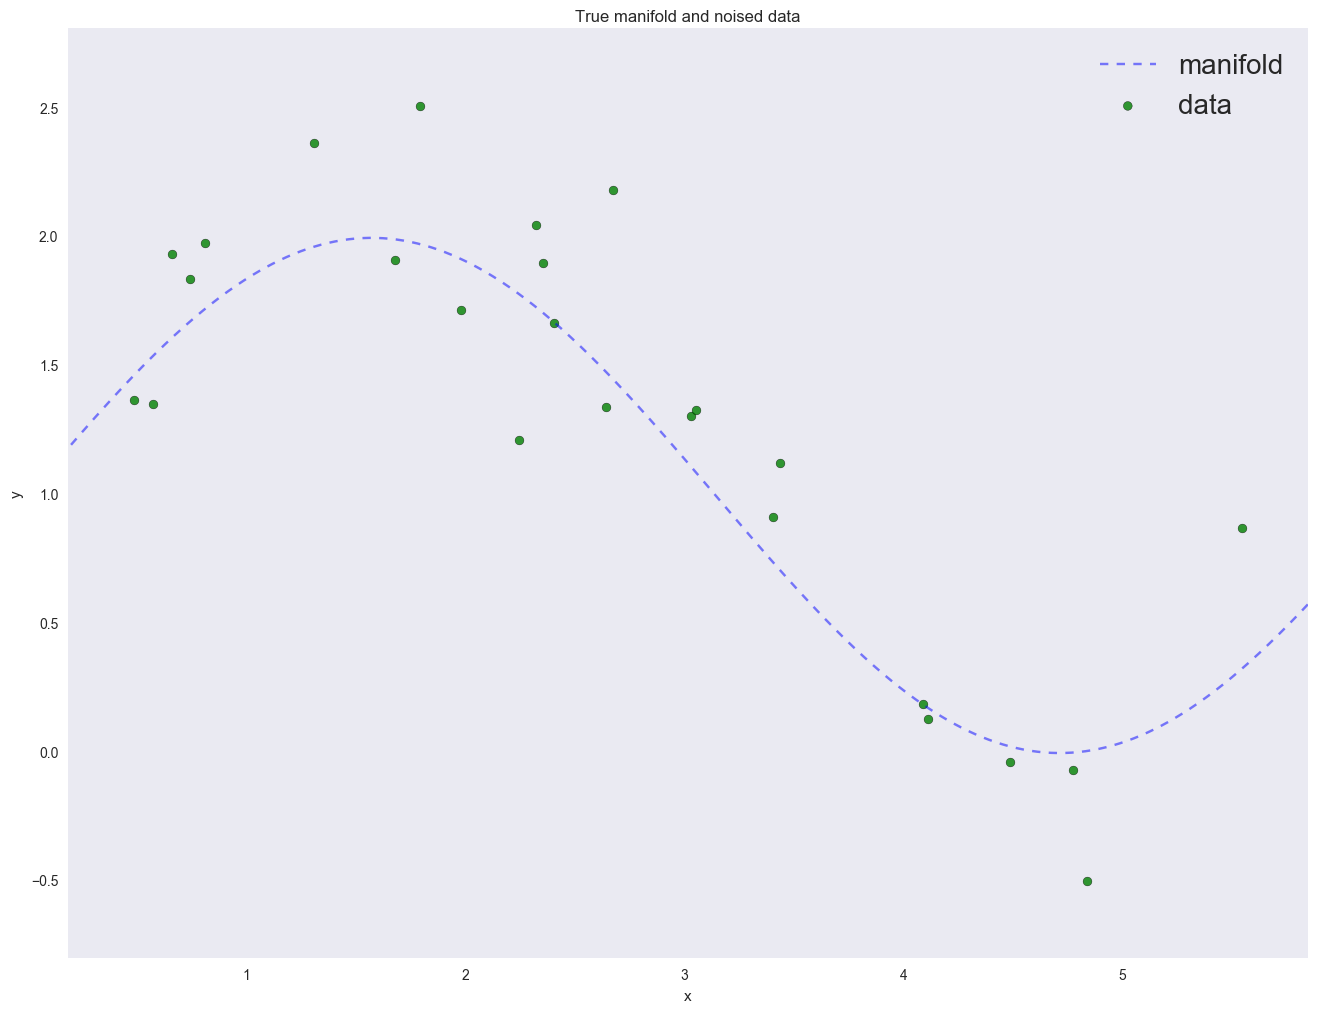

In [3]:
data = generate_wave_set(1000, 25)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$$\Large J\left(\vec{w}, X, \vec{y}\right) = \frac{1}{2} \left\| X \vec{w} - \vec{y} \right\|_2^2 = \frac{1}{2} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2$$
$$\Large \hat{w} = \left(X^T X\right)^{-1}X^T \vec{y}$$

Top rows of X
[[ 1.          0.48428956]
 [ 1.          0.57234221]
 [ 1.          0.66039485]
 [ 1.          0.74215802]
 [ 1.          0.81134225]]
Fitted params
[ 2.42648096 -0.42818065]


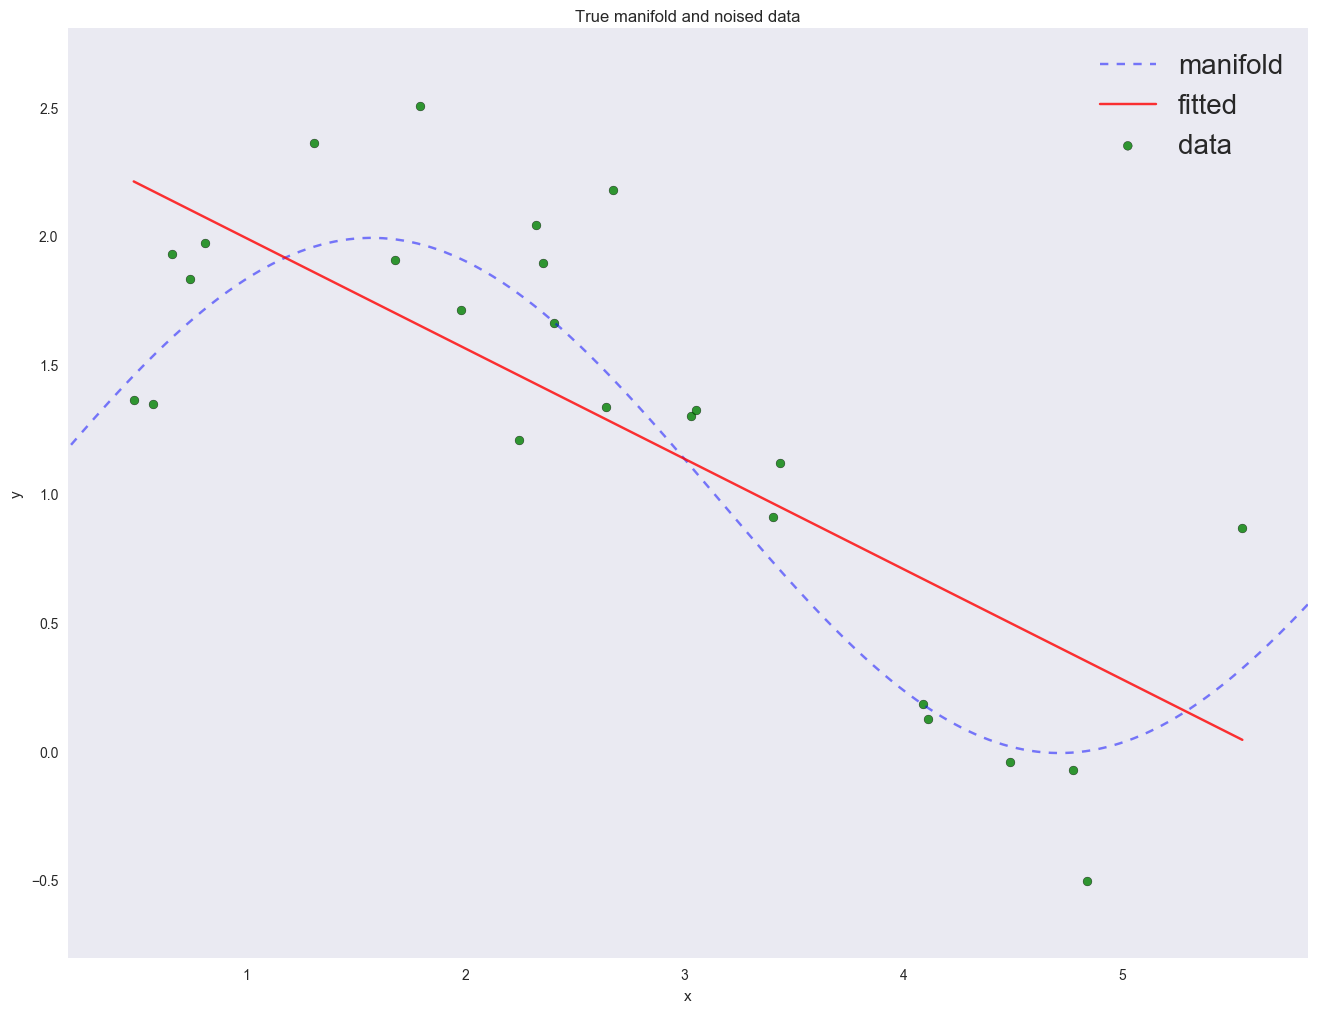

In [4]:
X = np.array([[1]*data['x_train'].shape[0], data['x_train']]).T
print 'Top rows of X'
print X[:5, :]
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print 'Fitted params'
print w
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$$\Large P_n\left(x\right) = \sum_{i=0}^n = w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^n$$

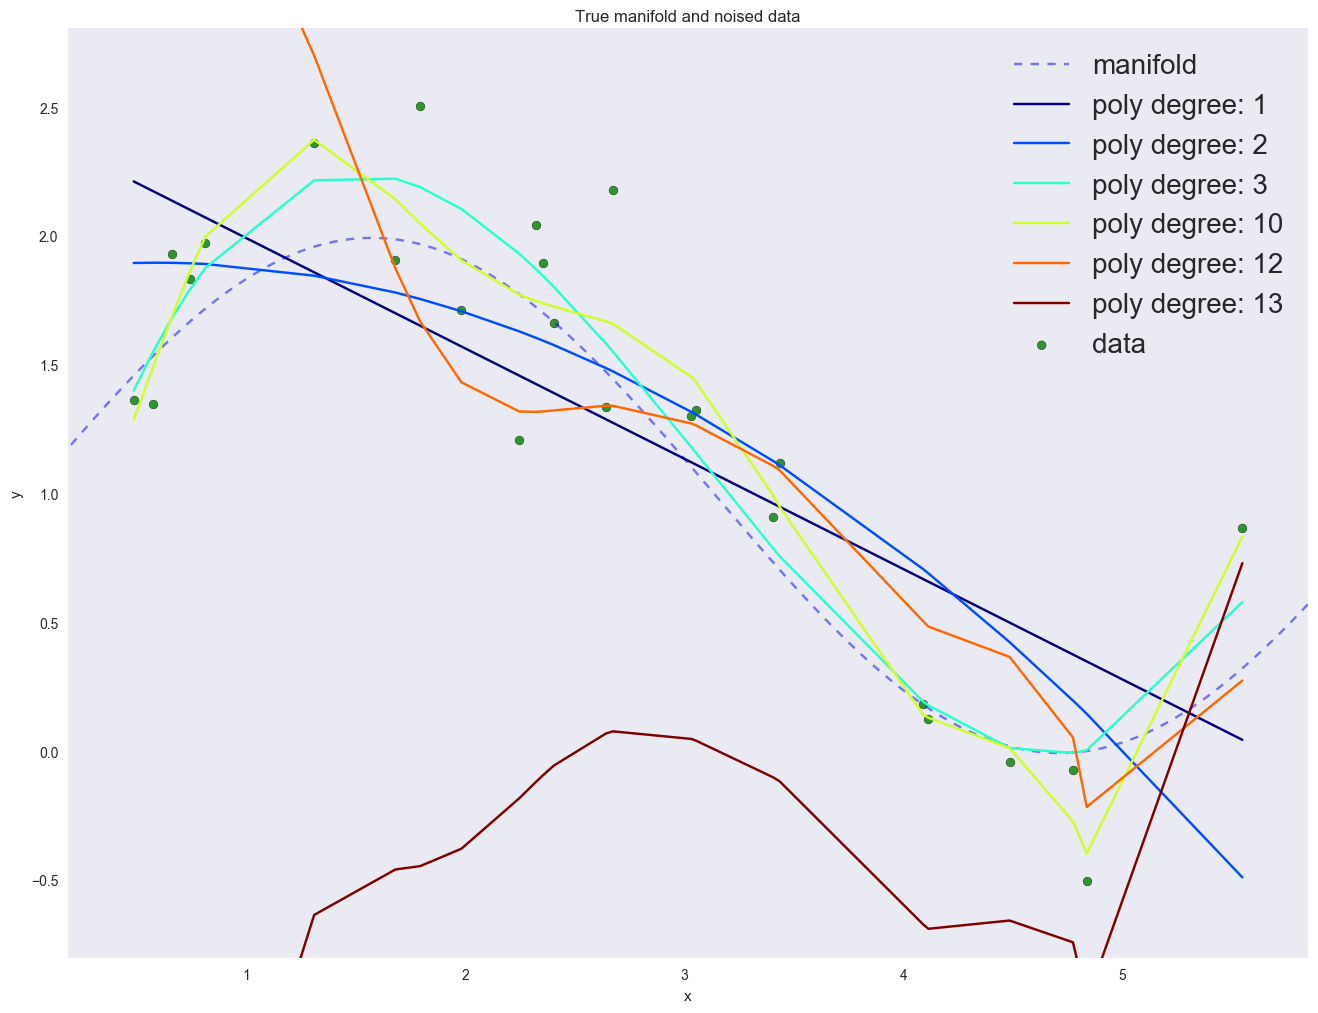

In [5]:
degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

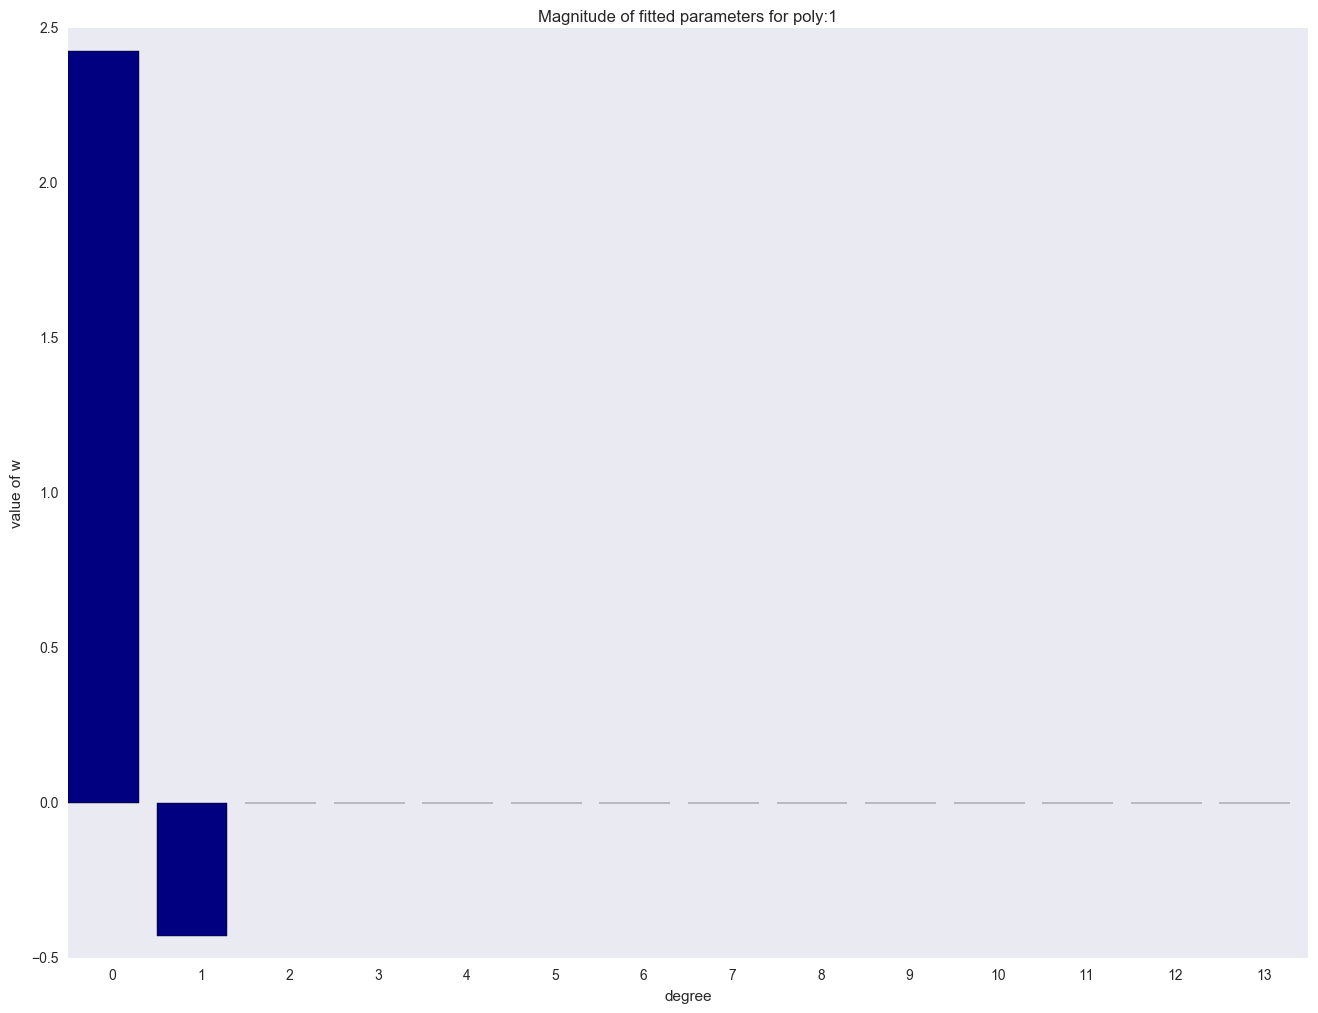

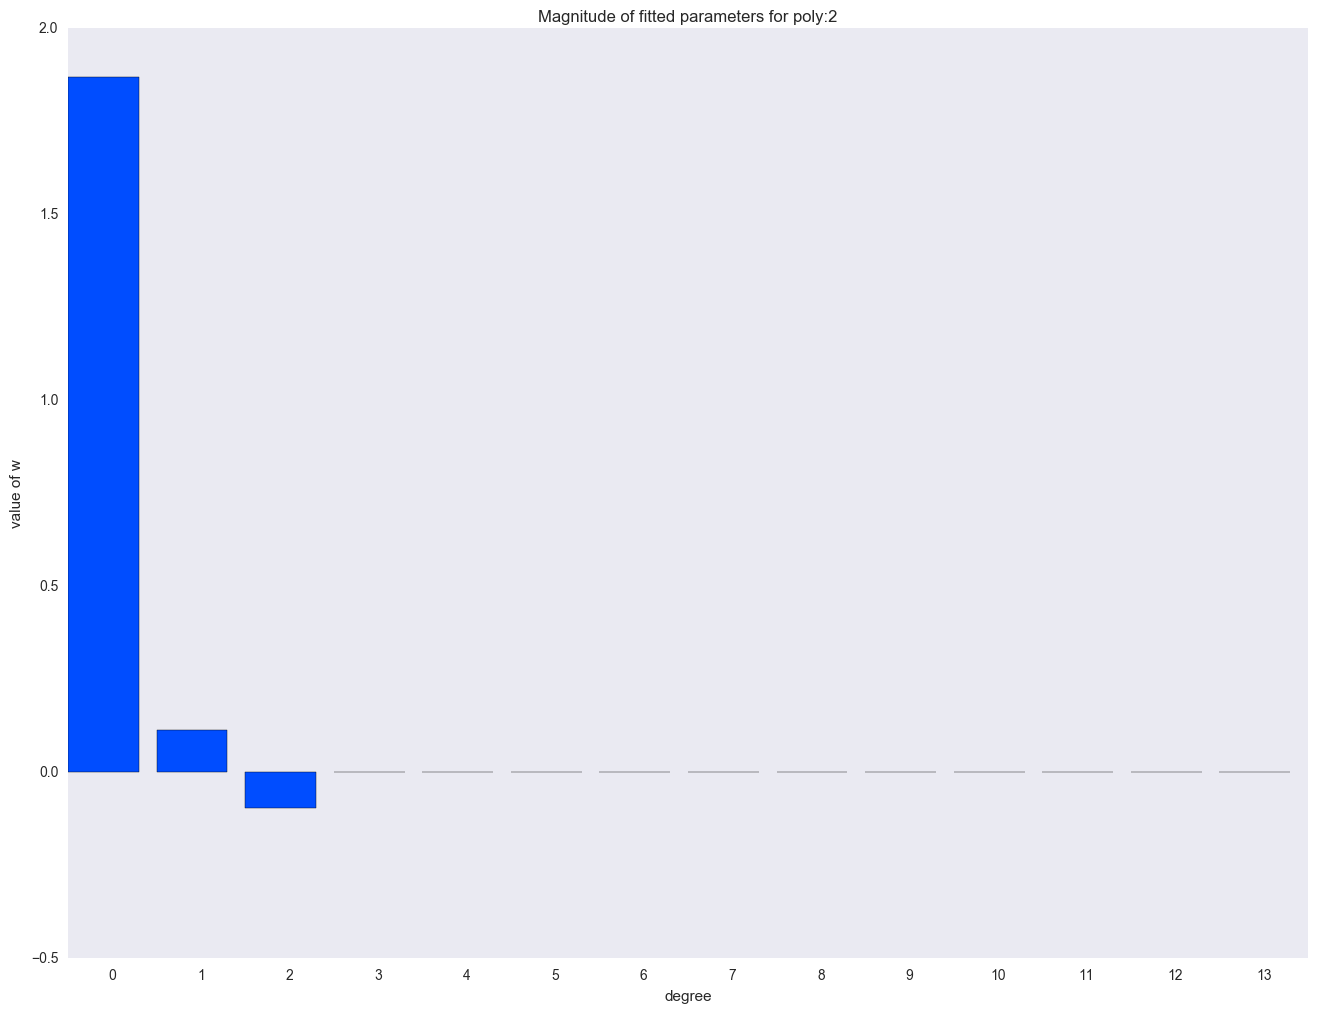

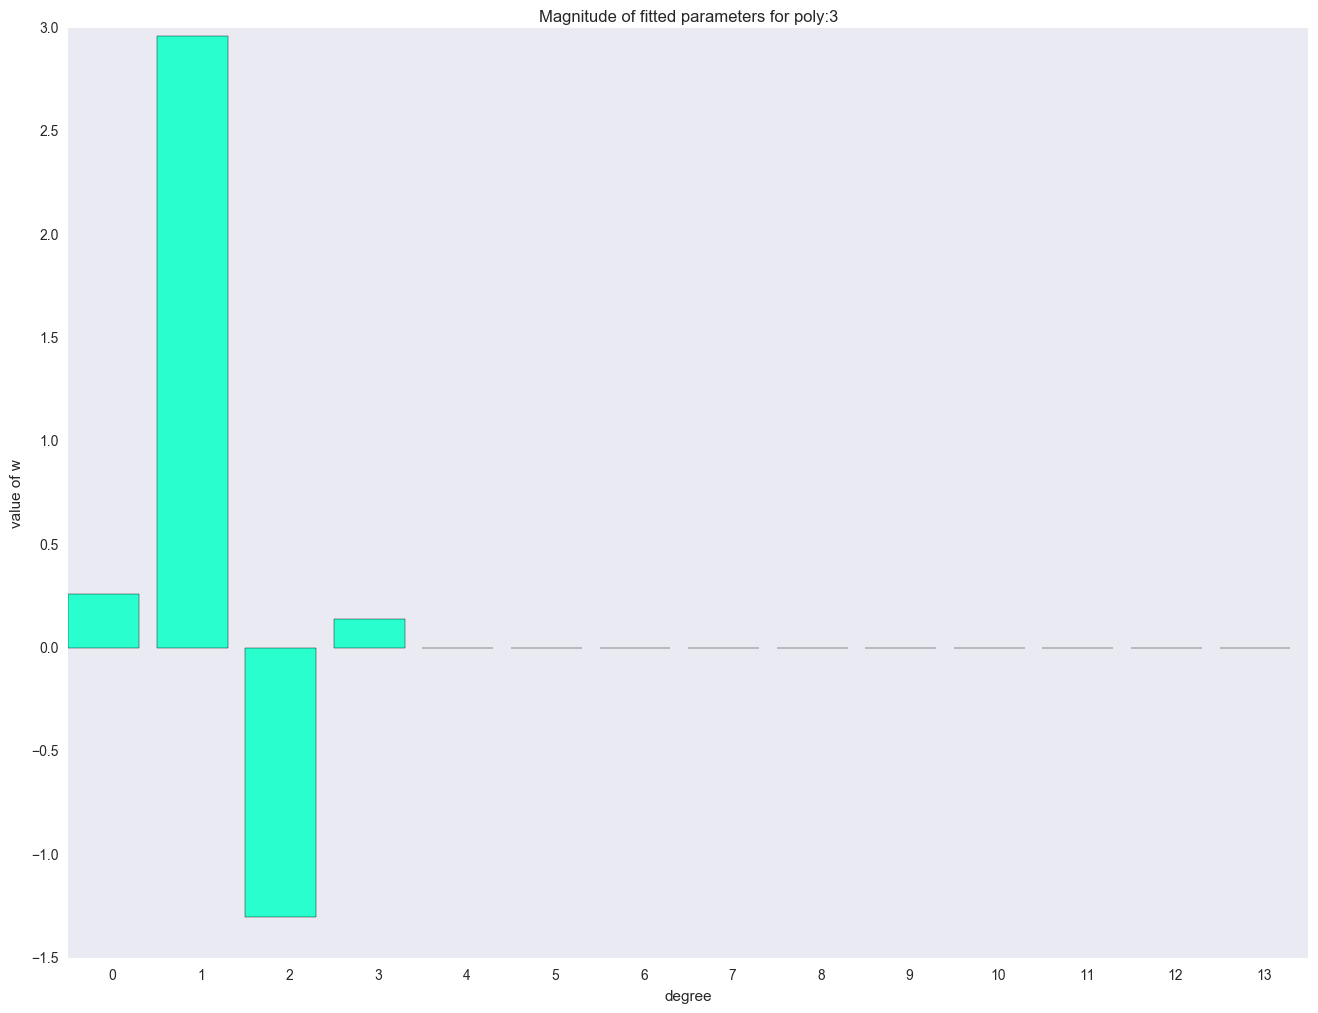

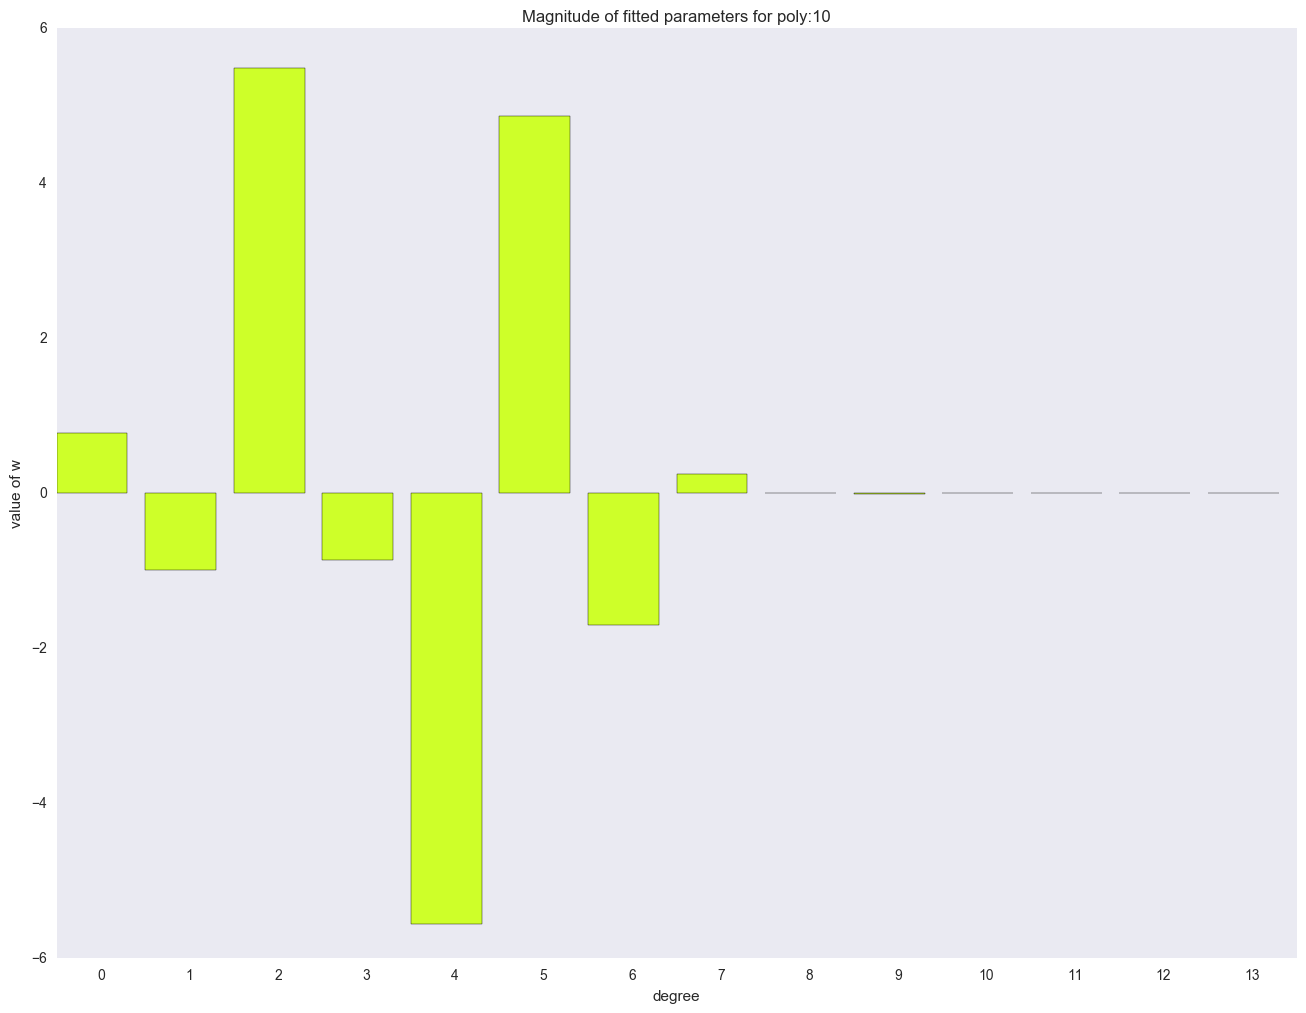

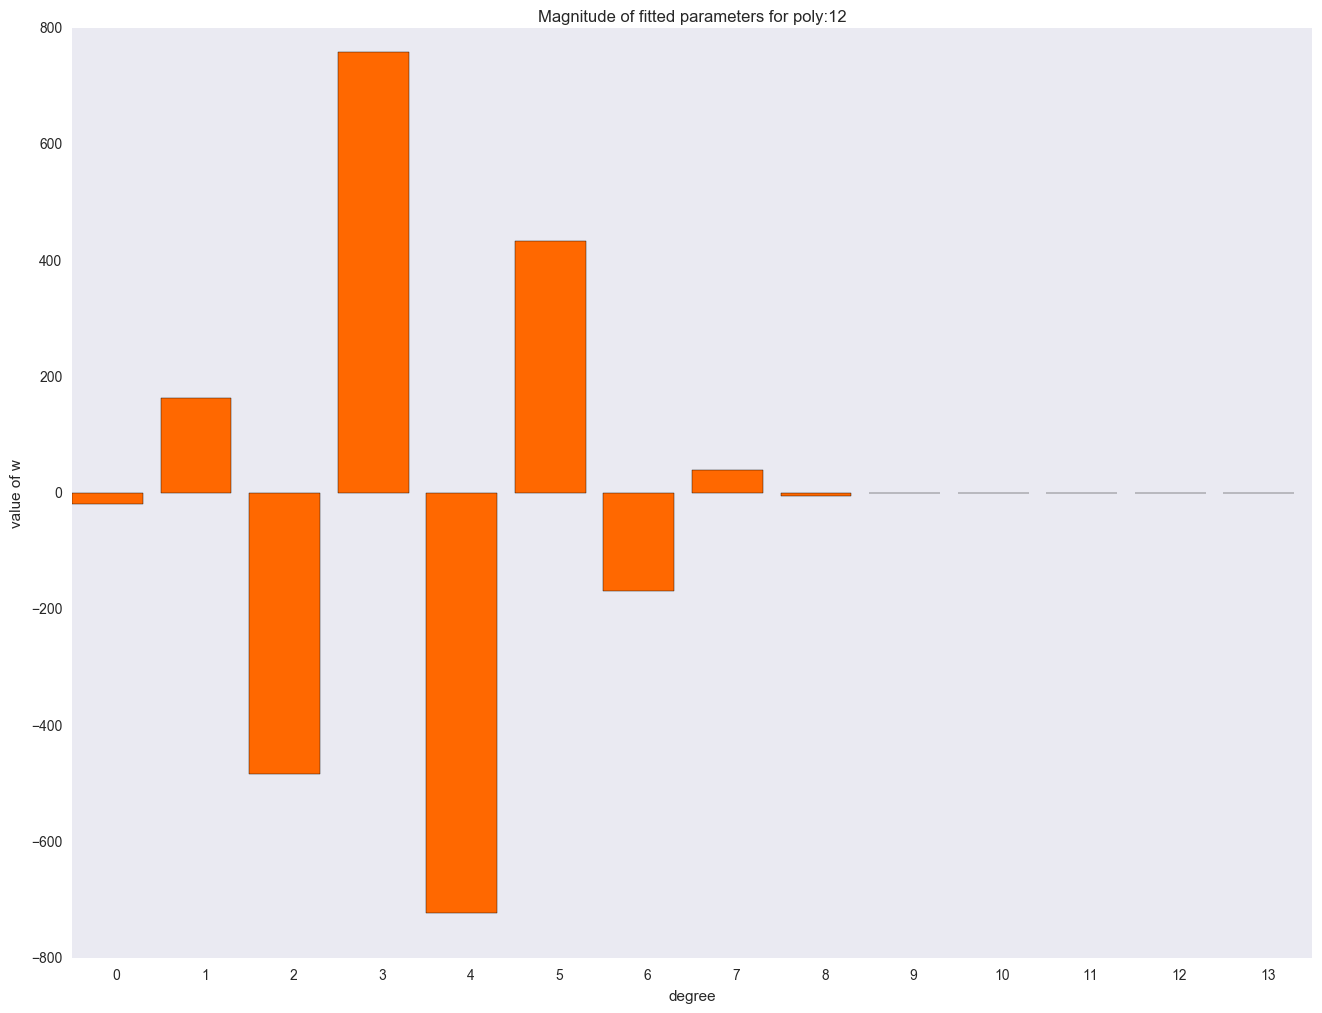

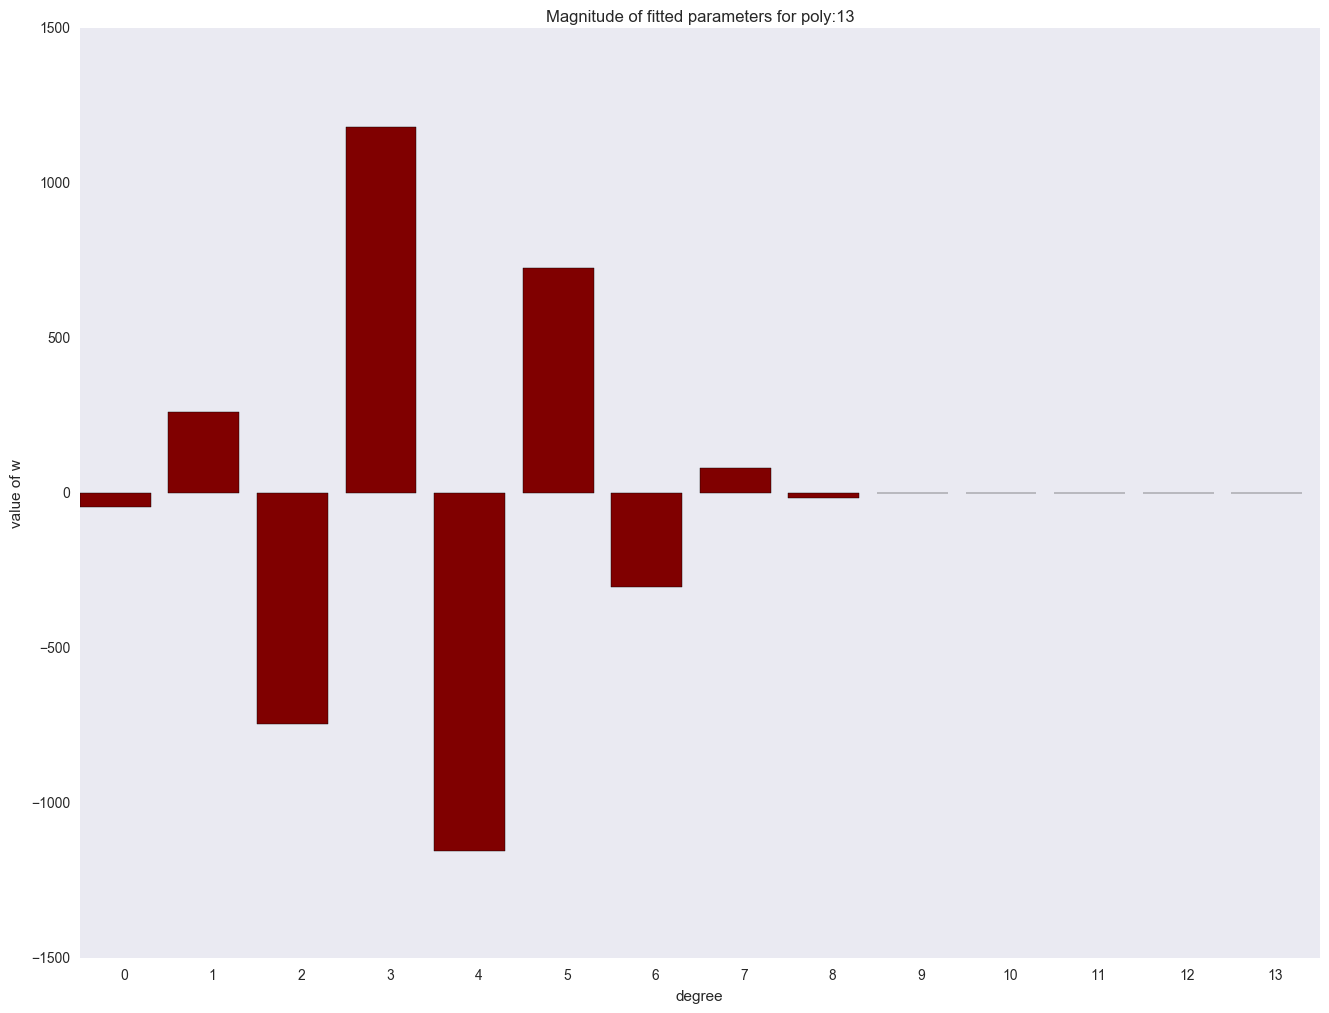

In [6]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

$$\Large J\left(\vec{w}, X, \vec{y}\right) = \frac{1}{2} \left\| X \vec{w} - \vec{y} \right\|_2^2 = \frac{1}{2} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2$$
$$\Large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2$$
$$\Large J_{new}\left(\vec{w}, X, \vec{y}\right) = J\left(\vec{w}, X, \vec{y}\right) + \lambda R\left(\vec{w}\right)$$
$$\Large \hat{w} = \left(X^T X + \lambda I\right)^{-1} X^T \vec{y}$$

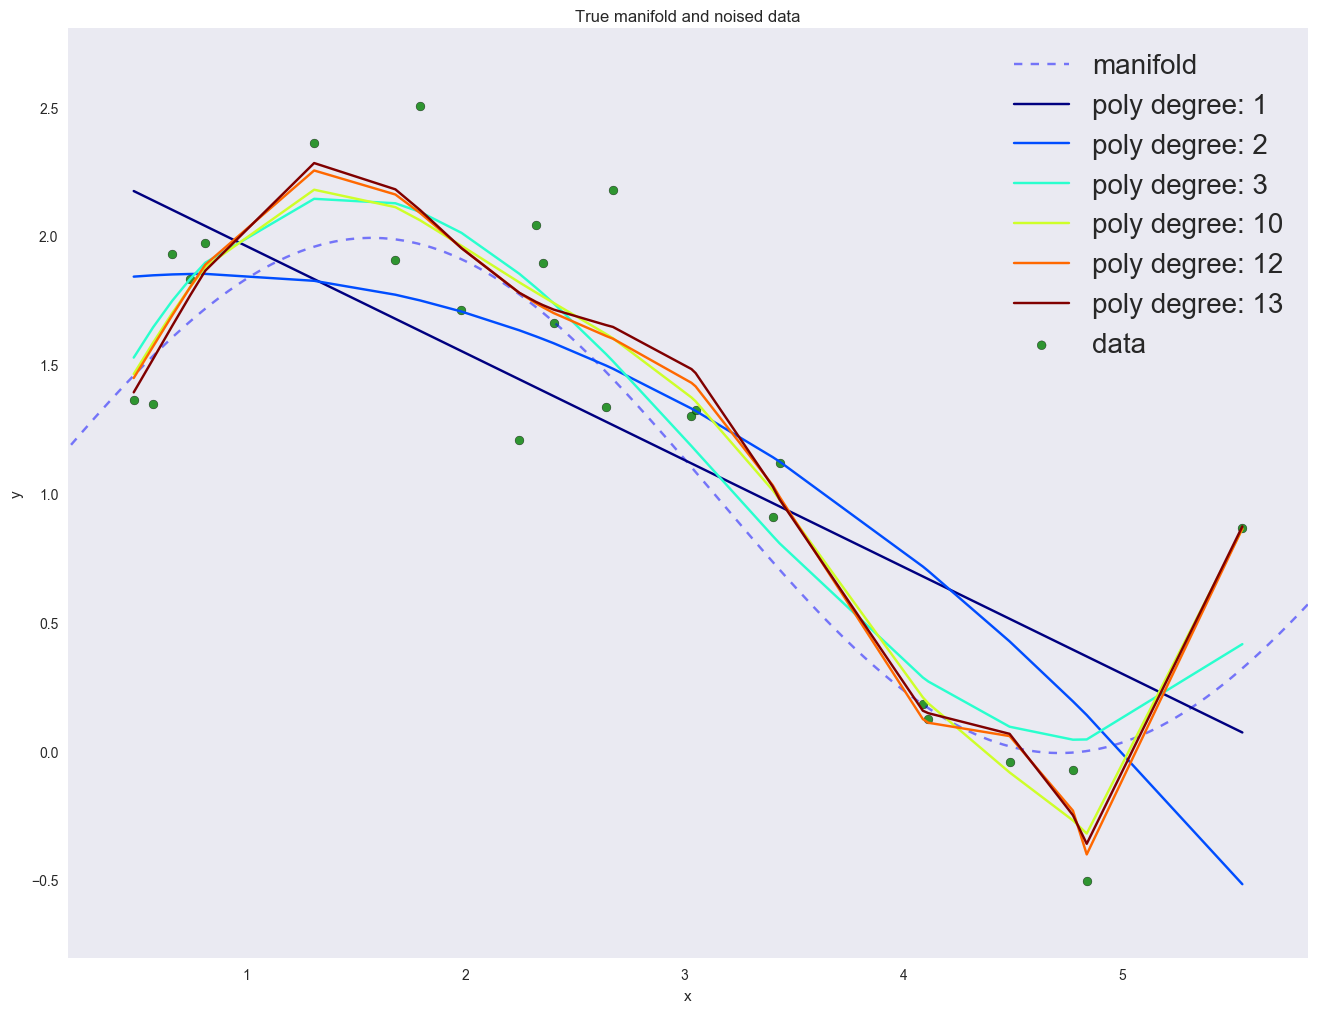

In [7]:
lmbd = 0.1

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list_l2 = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

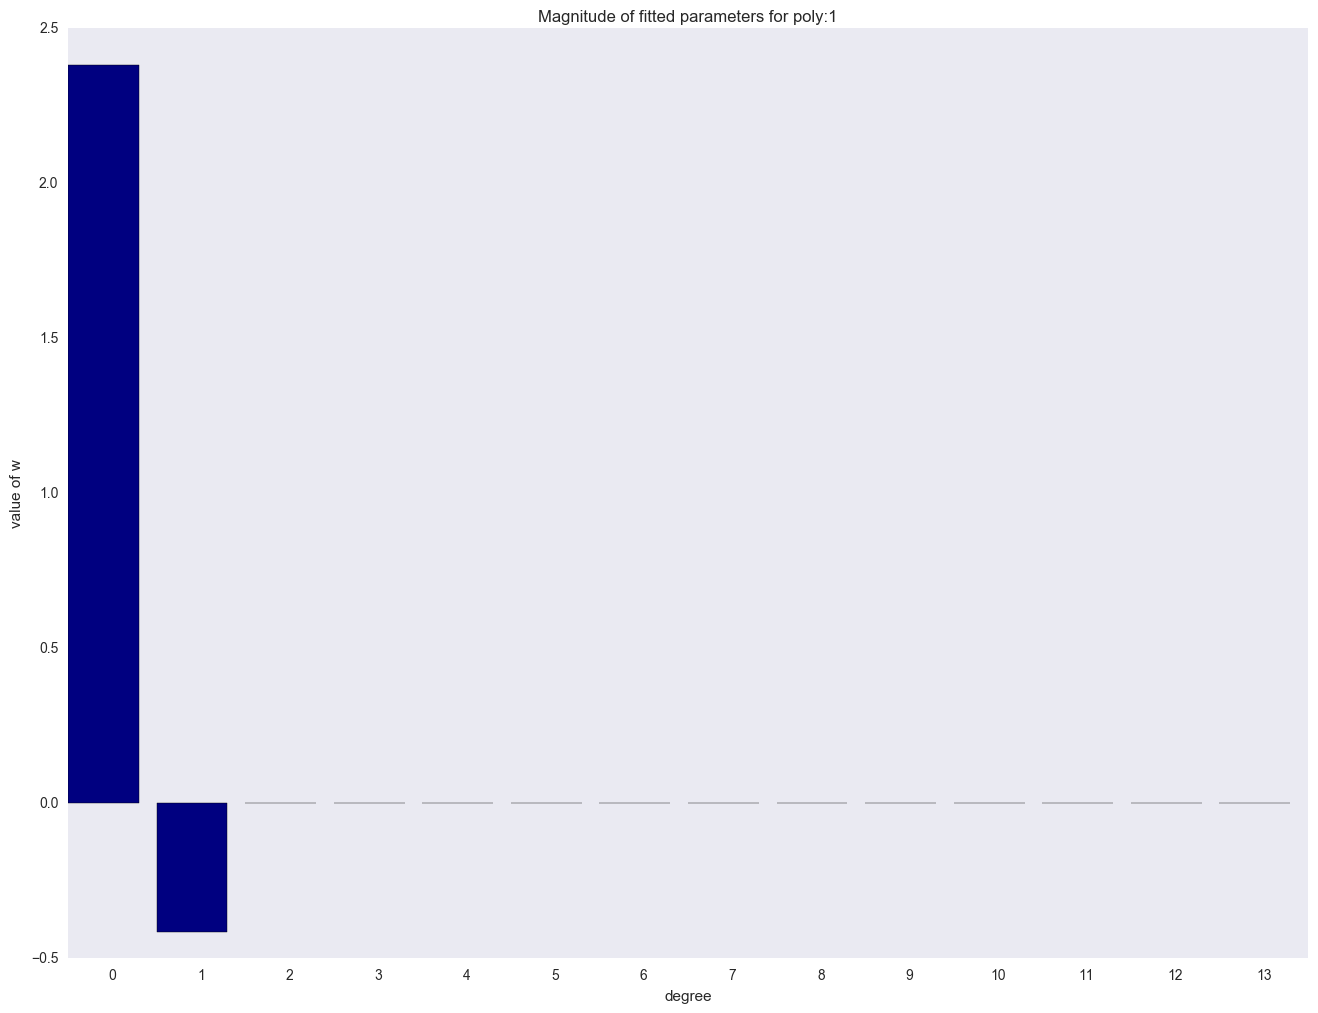

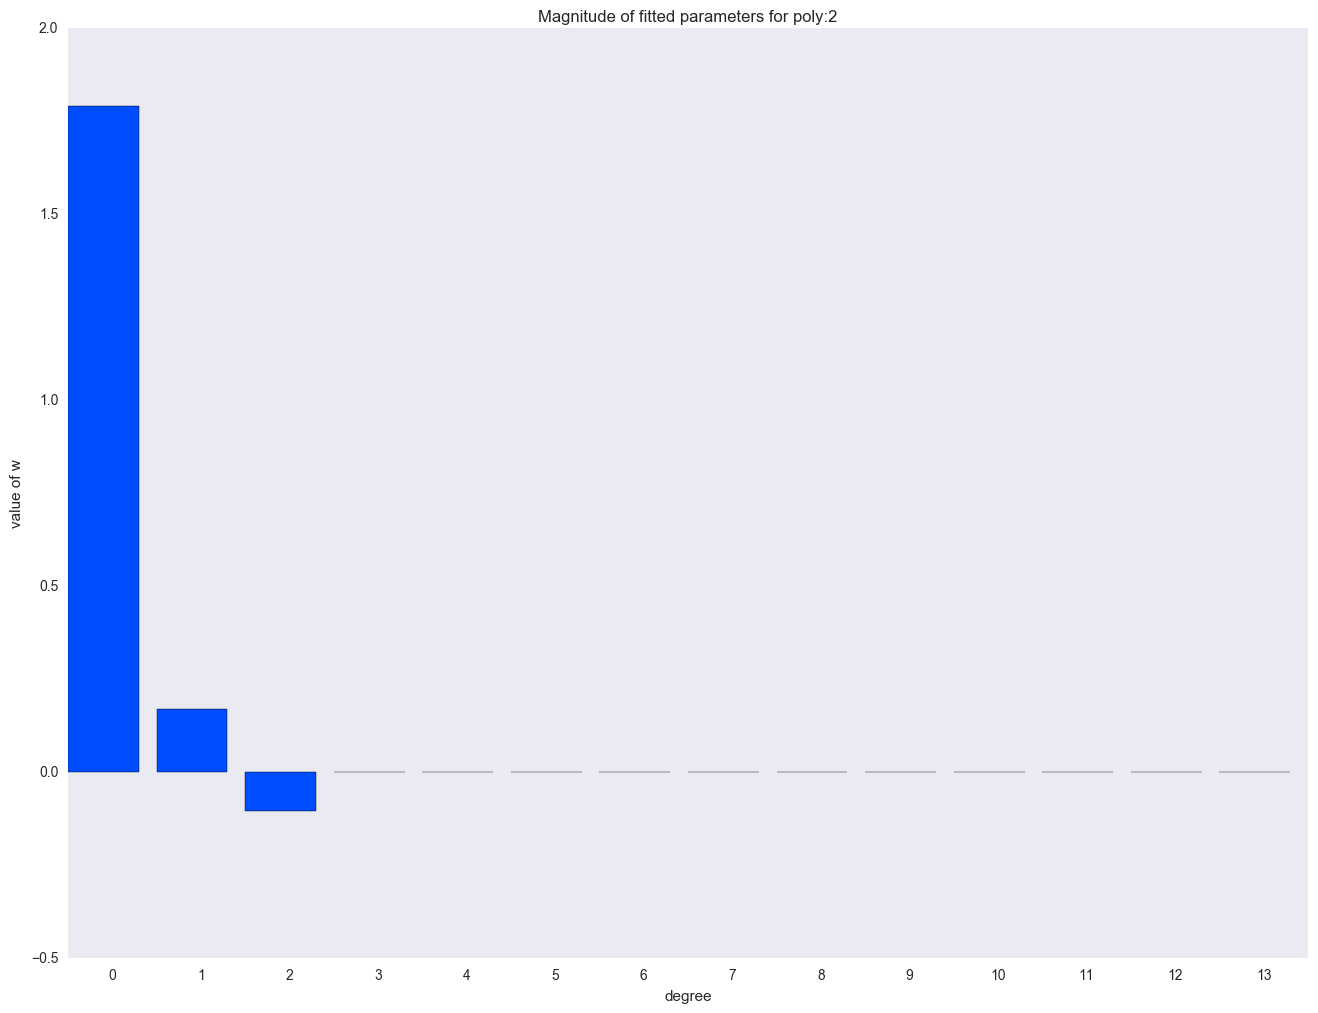

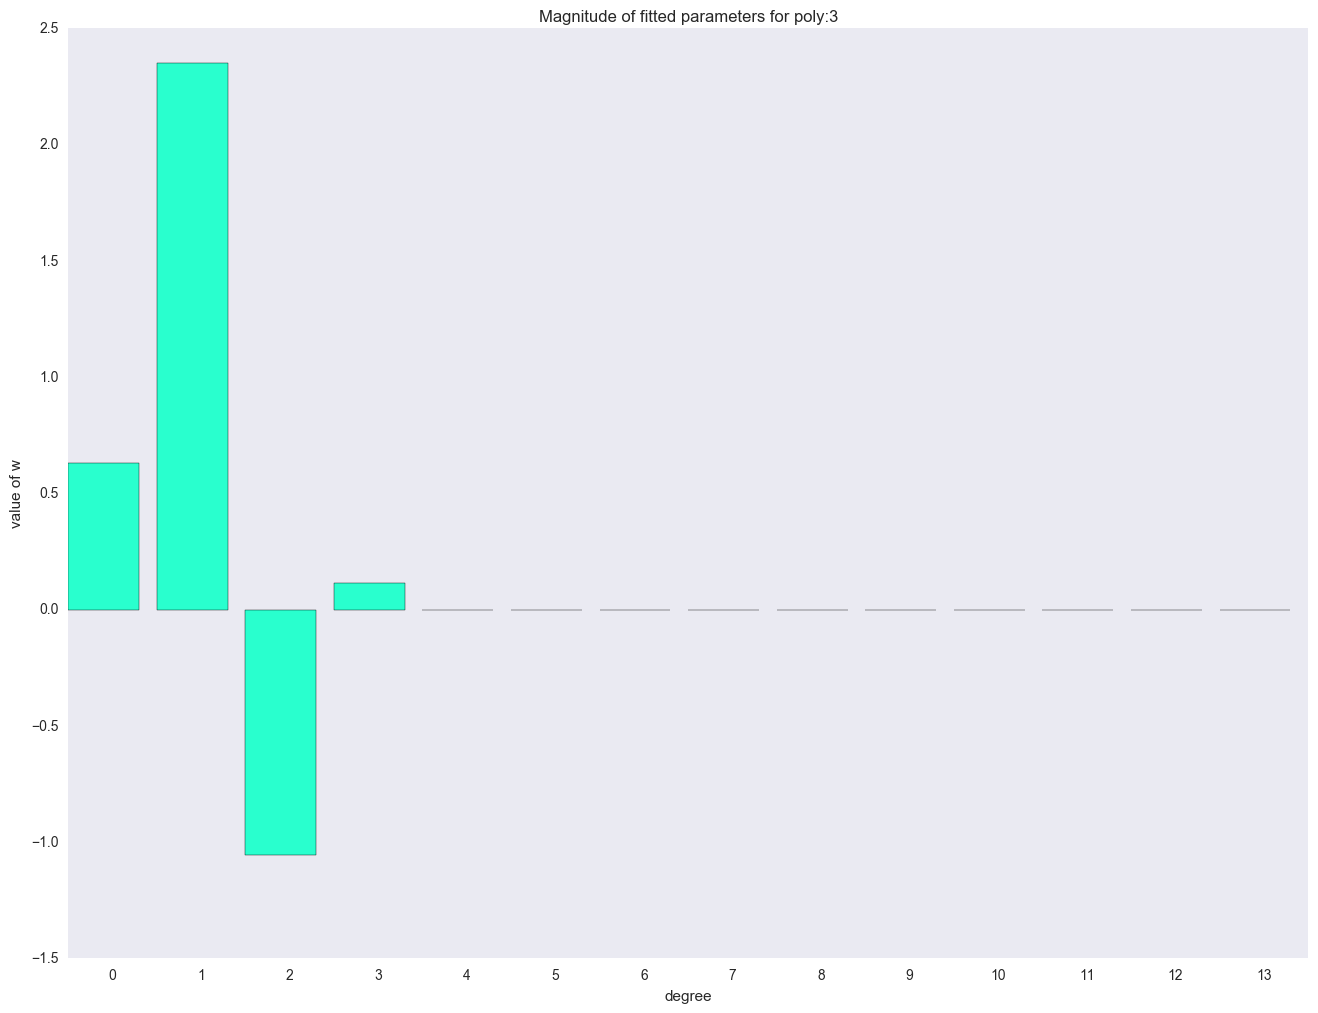

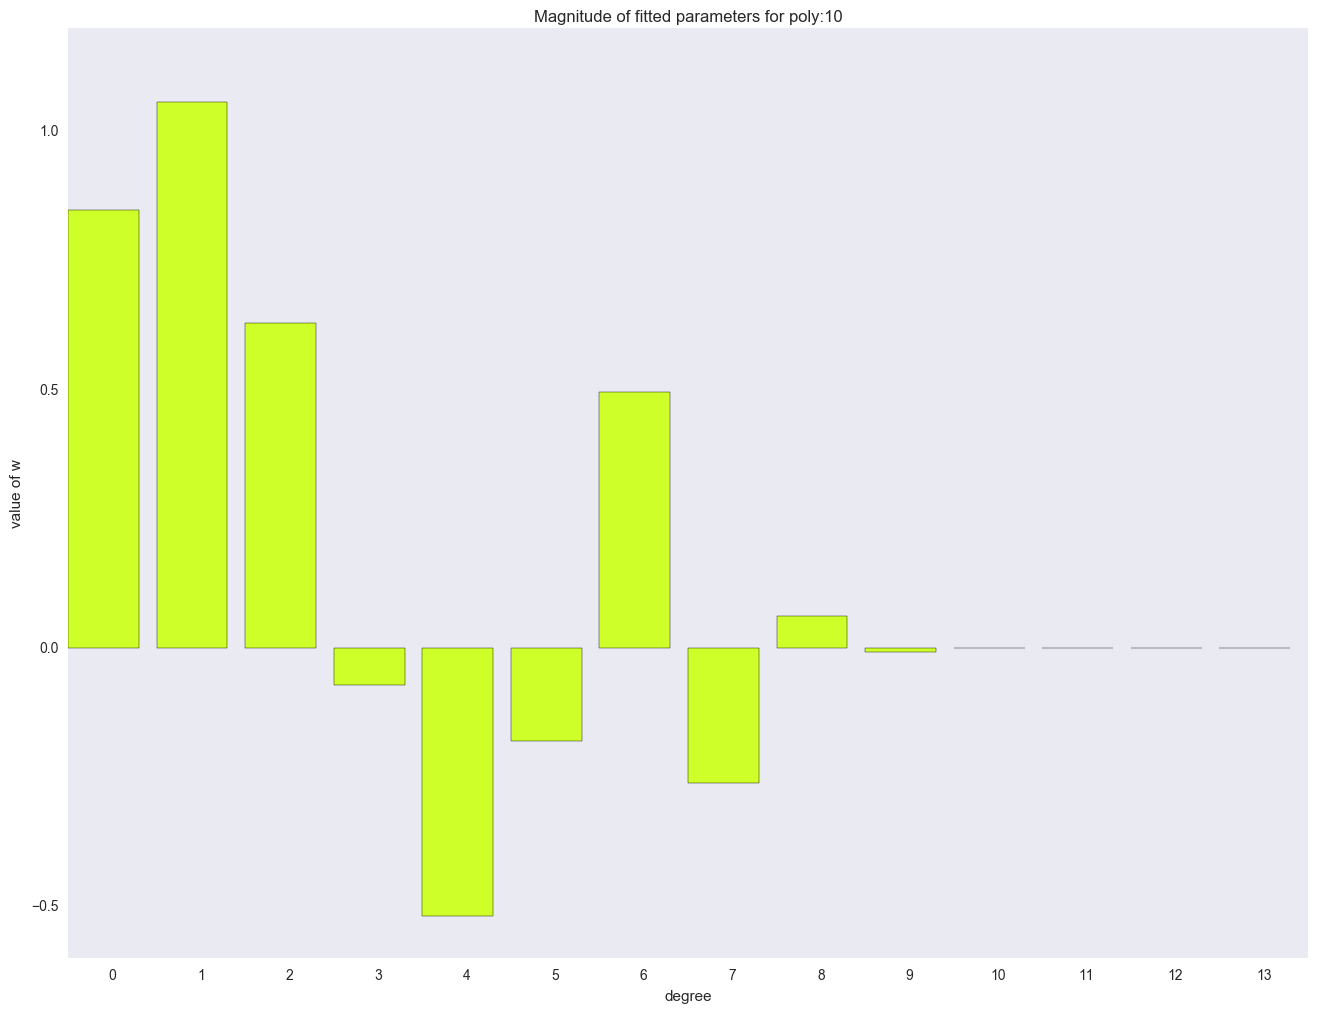

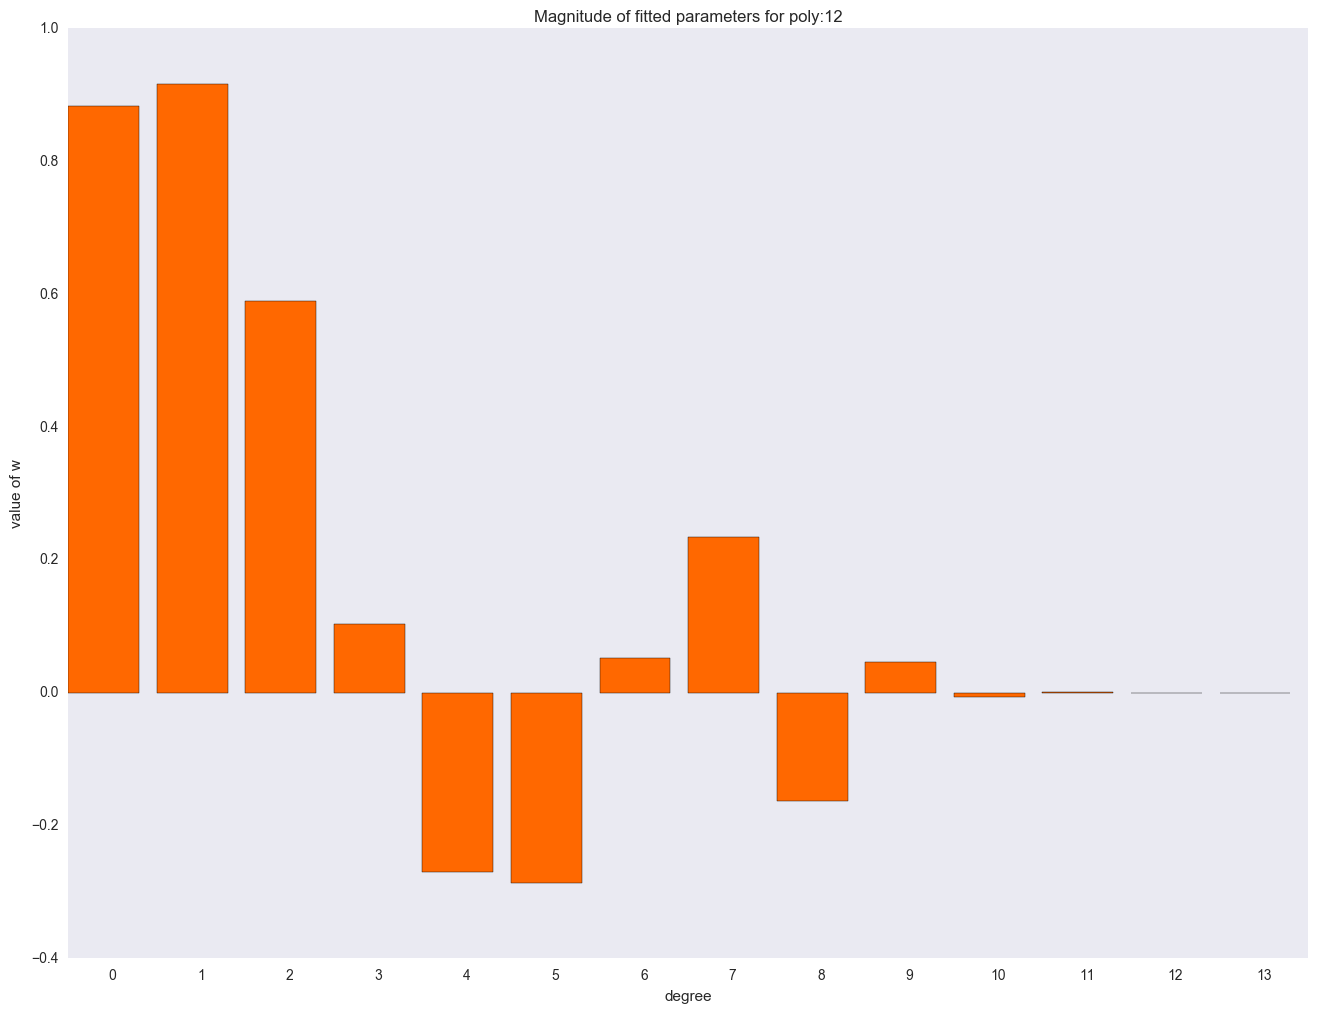

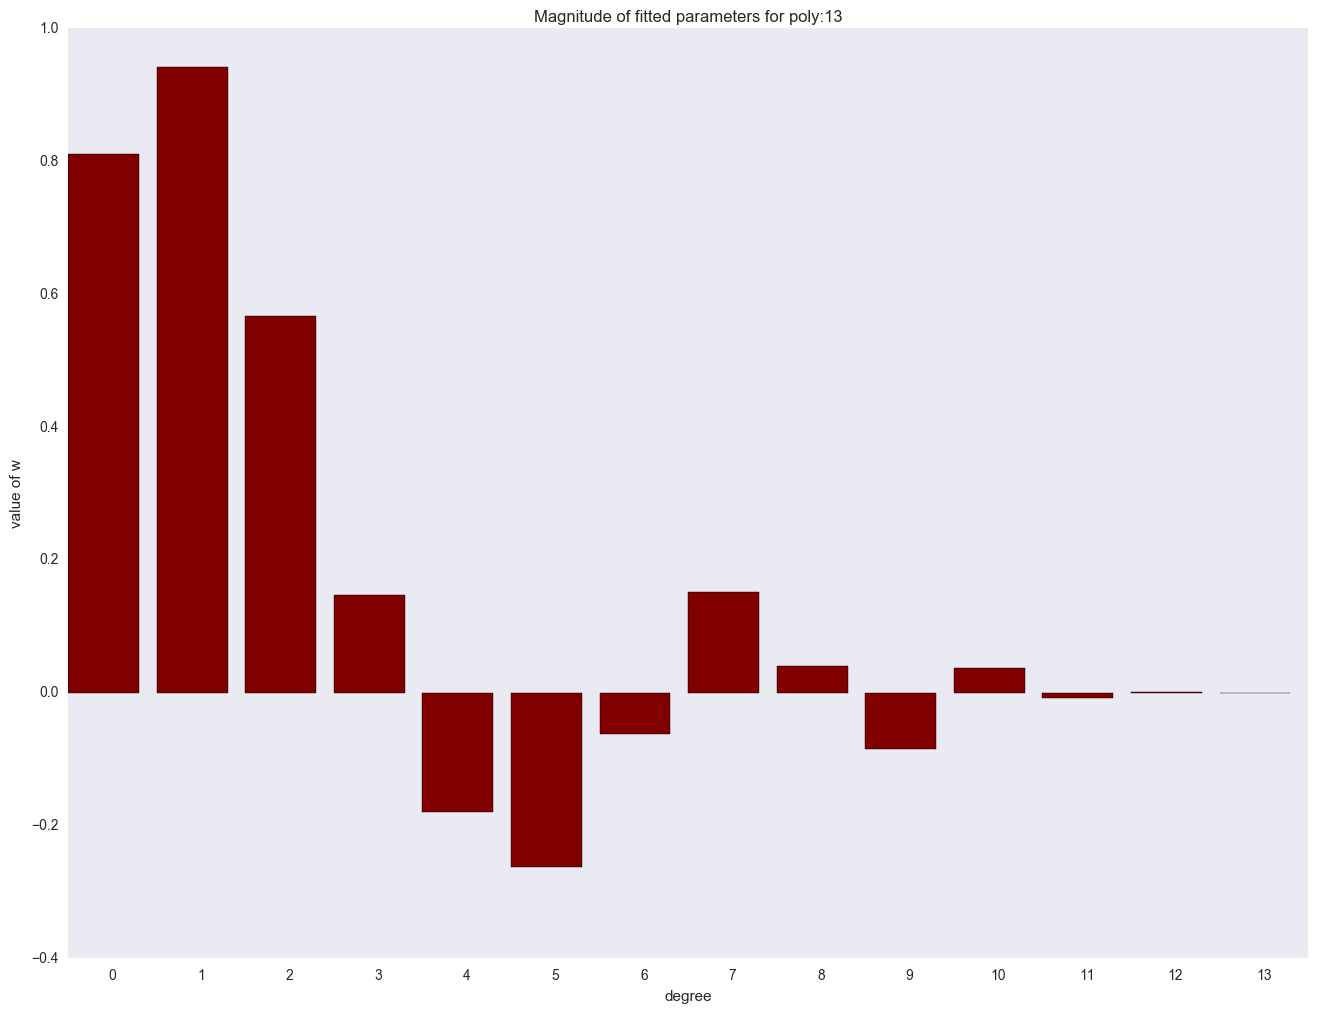

In [8]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

$$\Large J\left(\vec{w}, X, \vec{y}\right) = \frac{1}{2} \left\| X \vec{w} - \vec{y} \right\|_2^2 = \frac{1}{2} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2$$
$$\Large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left|w_j\right|$$
$$\Large J_{new}\left(\vec{w}, X, \vec{y}\right) = J\left(\vec{w}, X, \vec{y}\right) + \lambda R\left(\vec{w}\right)$$
$$\Large \frac{\partial J}{\partial w_j} = \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \text{sign}(\vec{w})$$

In [9]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
X = np.array(dlist).T

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 18
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print loss[-1]

1.30512309607e+52
1.21979102448e+86
1.14003816795e+120
1.06549974406e+154
9.95834820717e+187
9.3072475679e+221
8.69871744673e+255
8.12997448128e+289
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


X mean:
[  1.00000000e+00   2.61717625e+00   8.89178866e+00   3.46858633e+01
   1.47337824e+02   6.62964718e+02   3.10664370e+03   1.49946179e+04
   7.40097896e+04   3.71757450e+05   1.89408958e+06   9.76488362e+06
   5.08473839e+07   2.67042329e+08]
X std
[  0.00000000e+00   1.42904764e+00   8.26280332e+00   4.36295151e+01
   2.28694895e+02   1.20605446e+03   6.41842261e+03   3.44672461e+04
   1.86543640e+05   1.01602565e+06   5.56120143e+06   3.05530627e+07
   1.68325268e+08   9.29250585e+08]


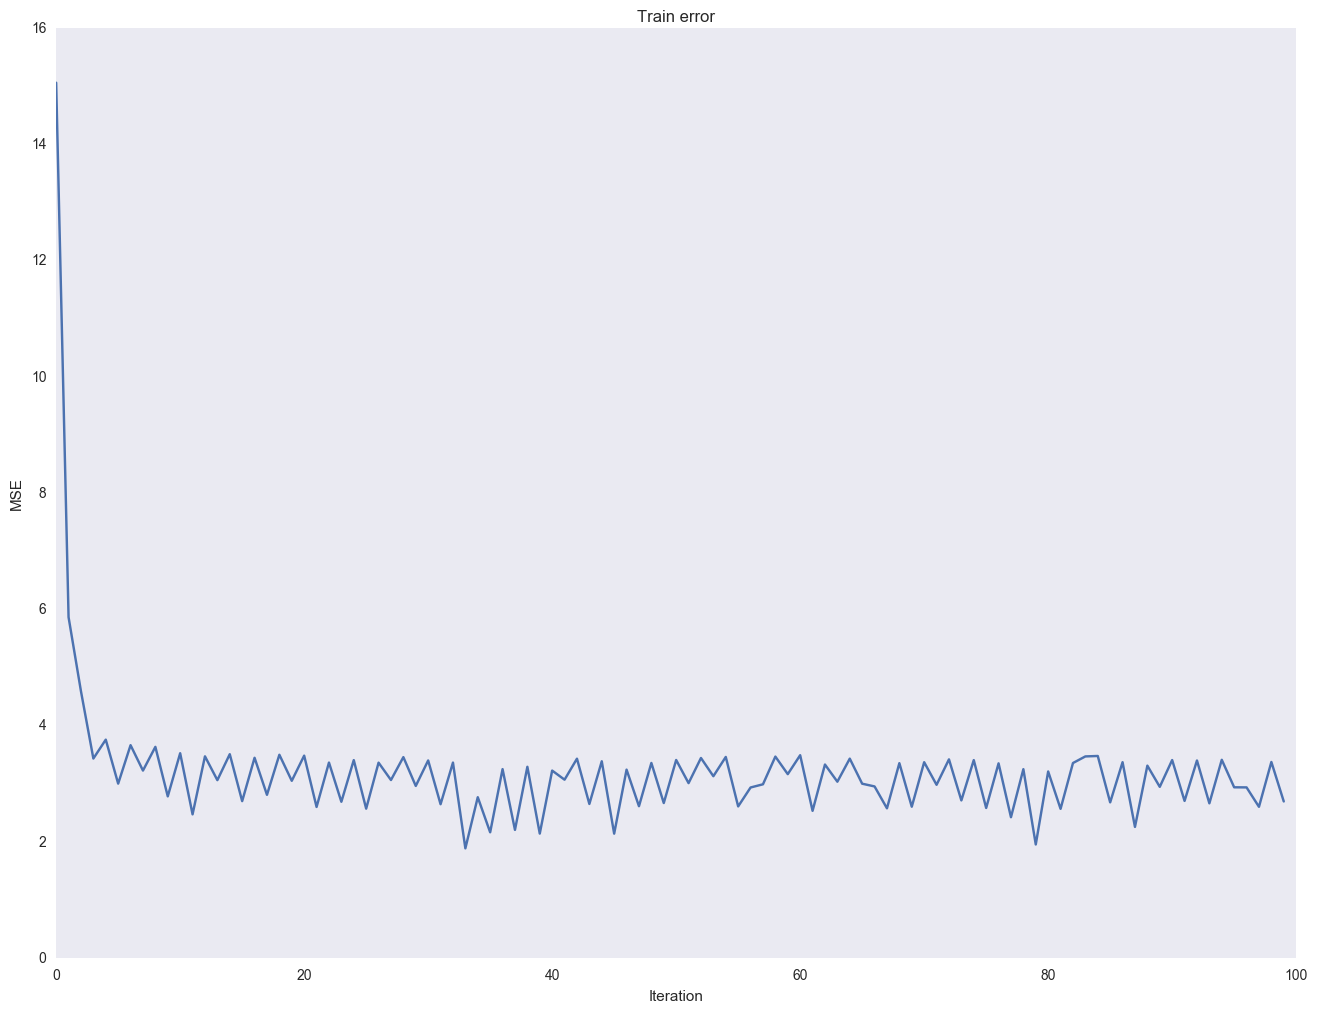

In [10]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
X = np.array(dlist).T
x_mean = X.mean(axis=0)
print 'X mean:'
print x_mean
x_std = X.std(axis=0)
print 'X std'
print x_std
X = (X - x_mean)/x_std
X[:, 0] = 1.0

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

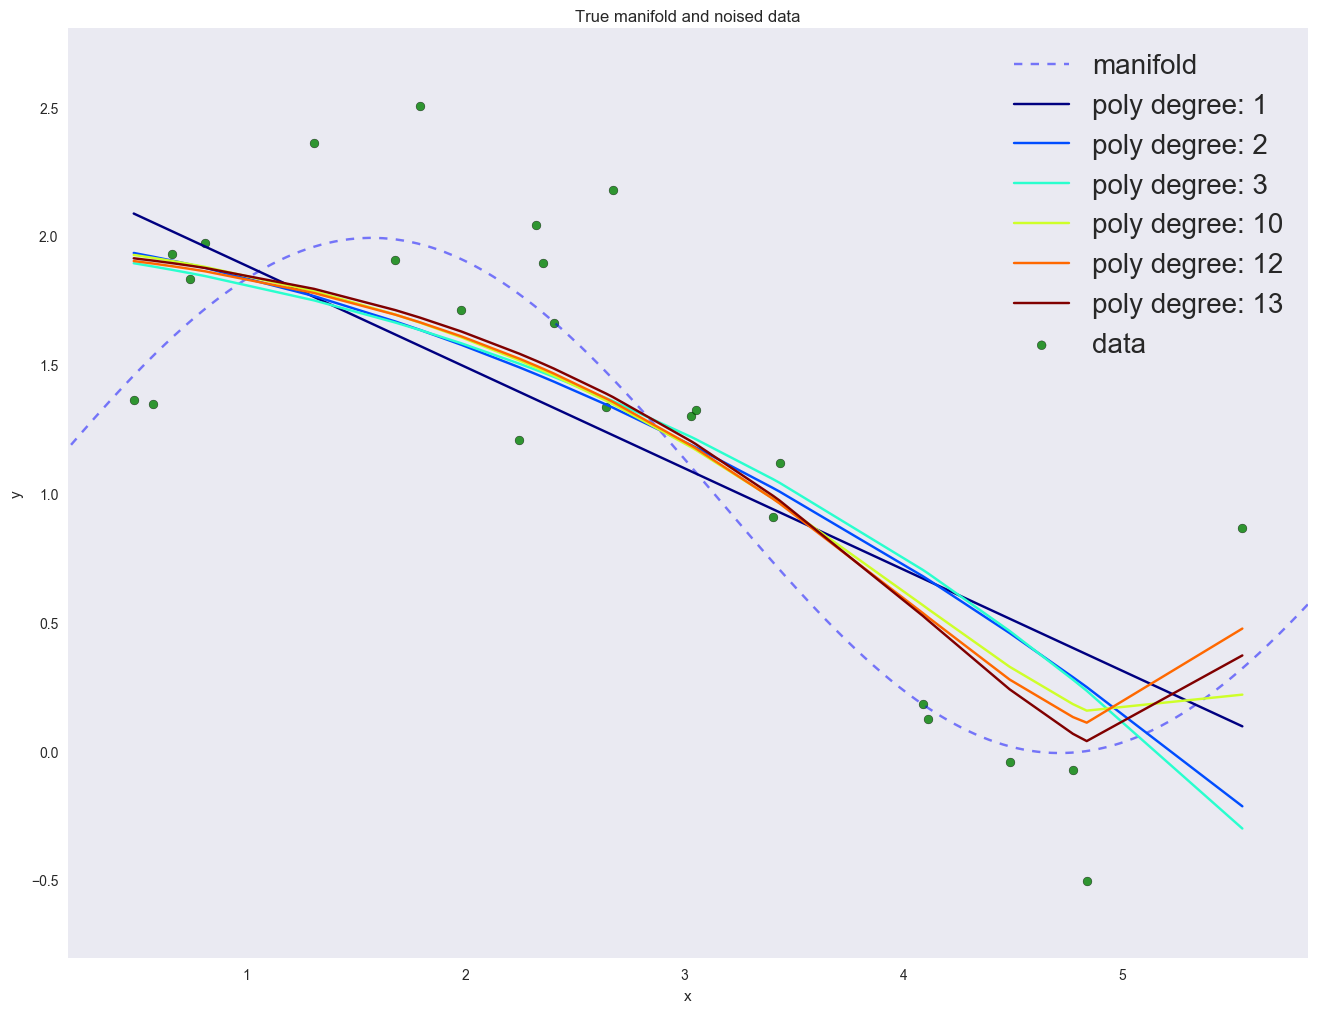

In [11]:
lmbd = 0.05

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w_list_l1 = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X[:, 0] = 1.0
    
    w = np.array([-1.0] * X.shape[1])
    n_iter = 100
    lr = 0.1
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(data['y_train'], y_hat))
    w_list_l1.append((degree, w))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

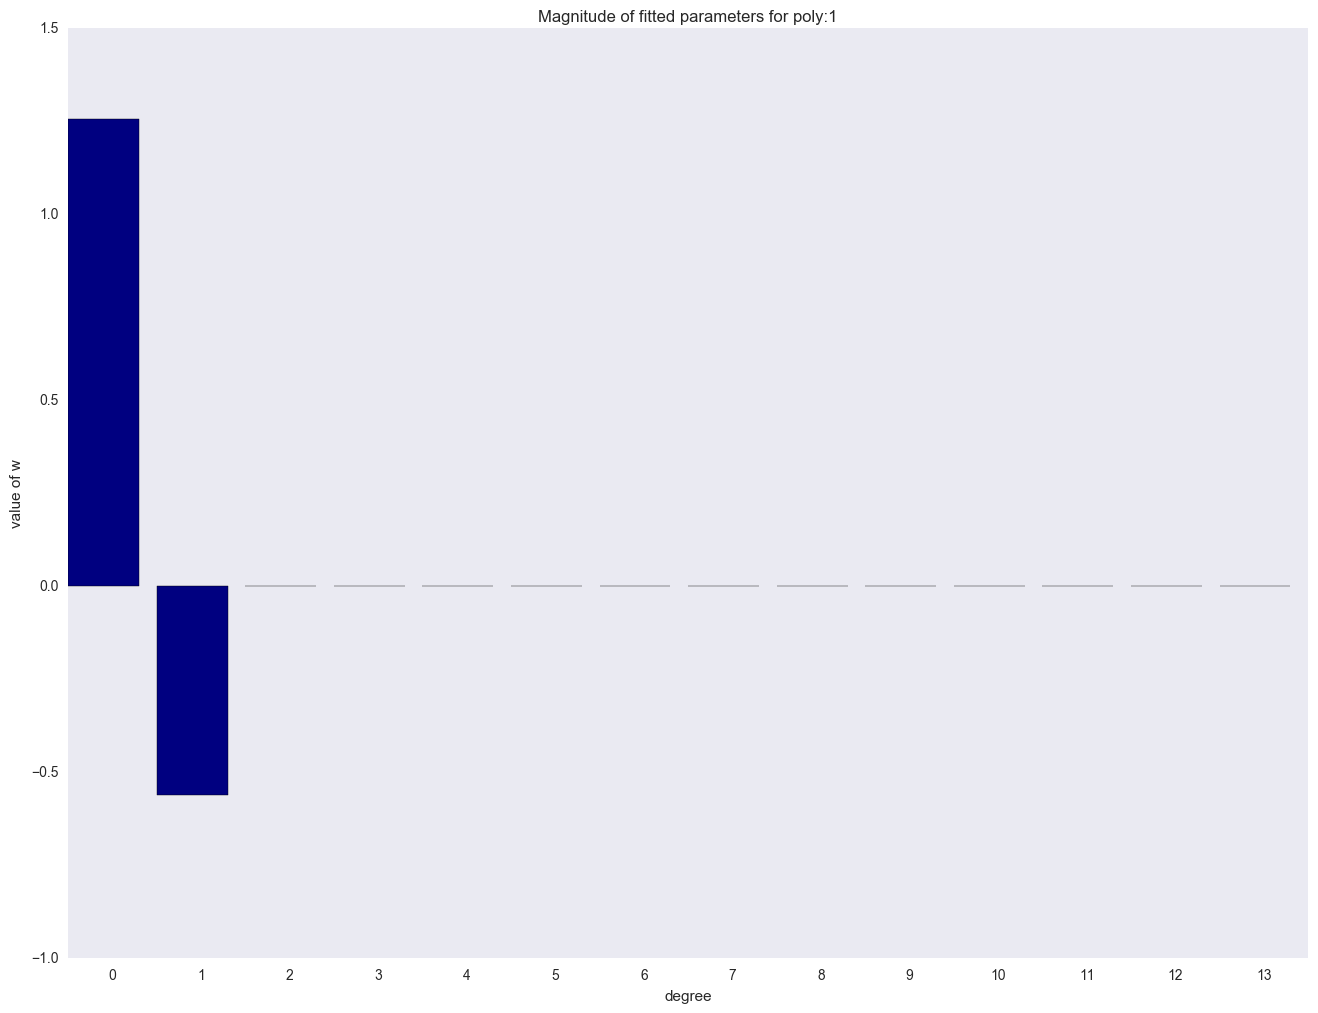

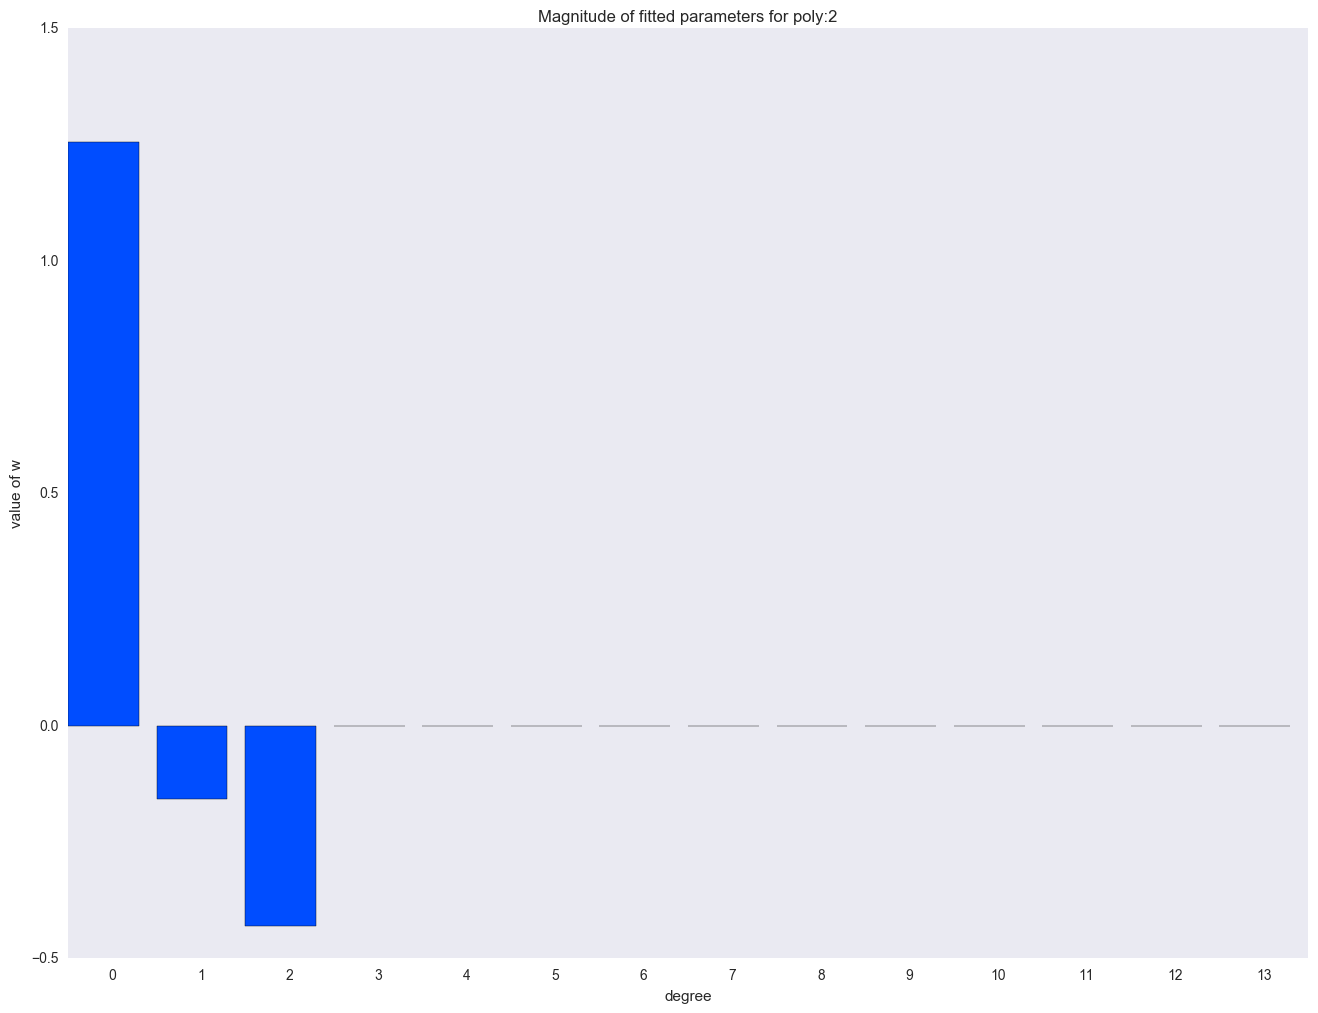

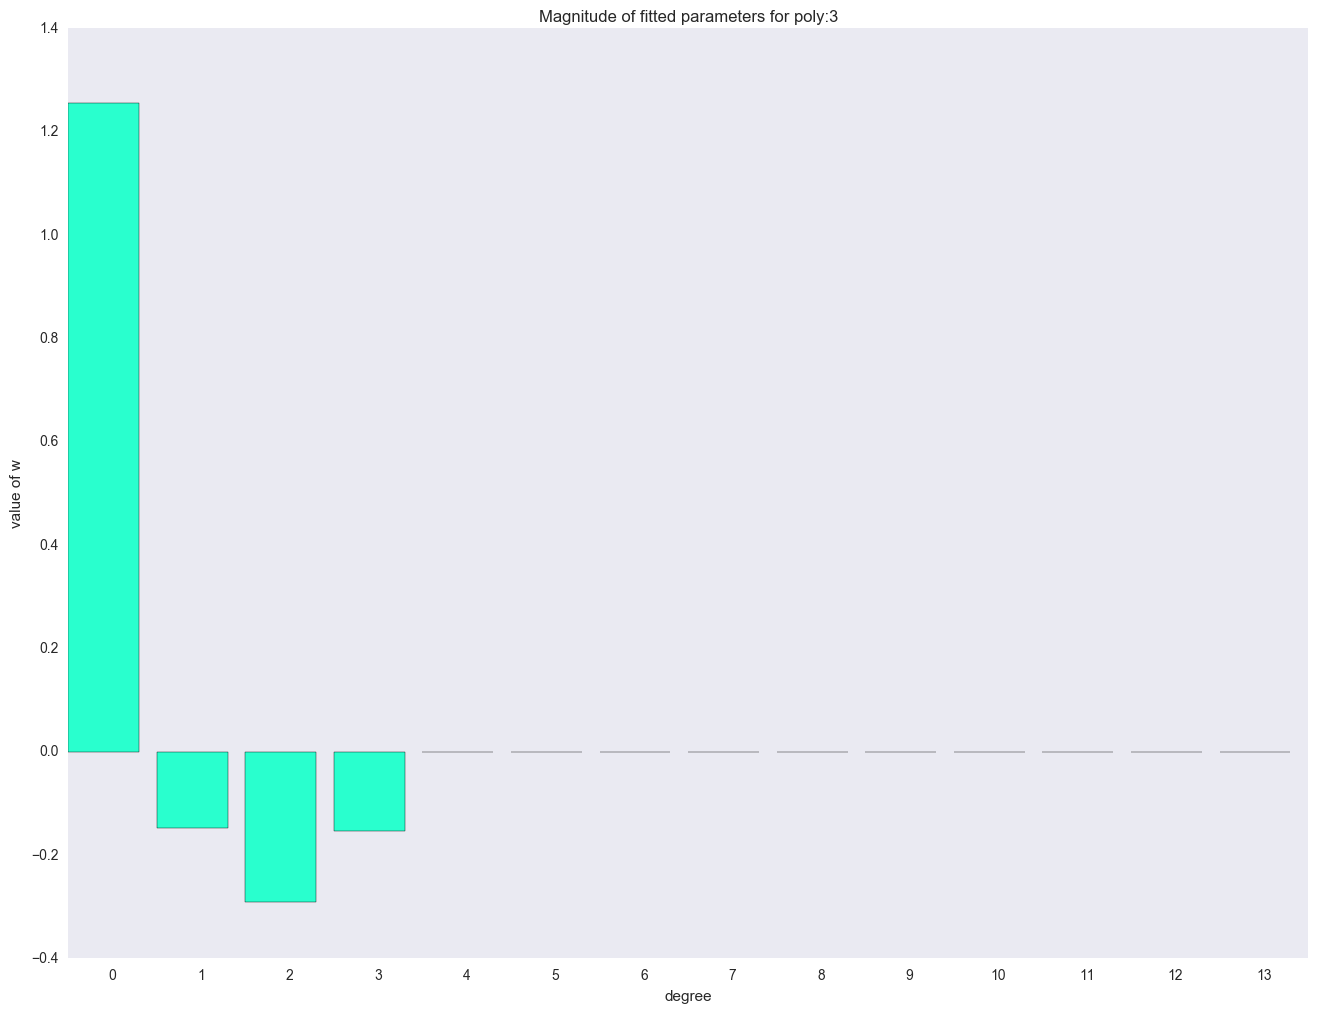

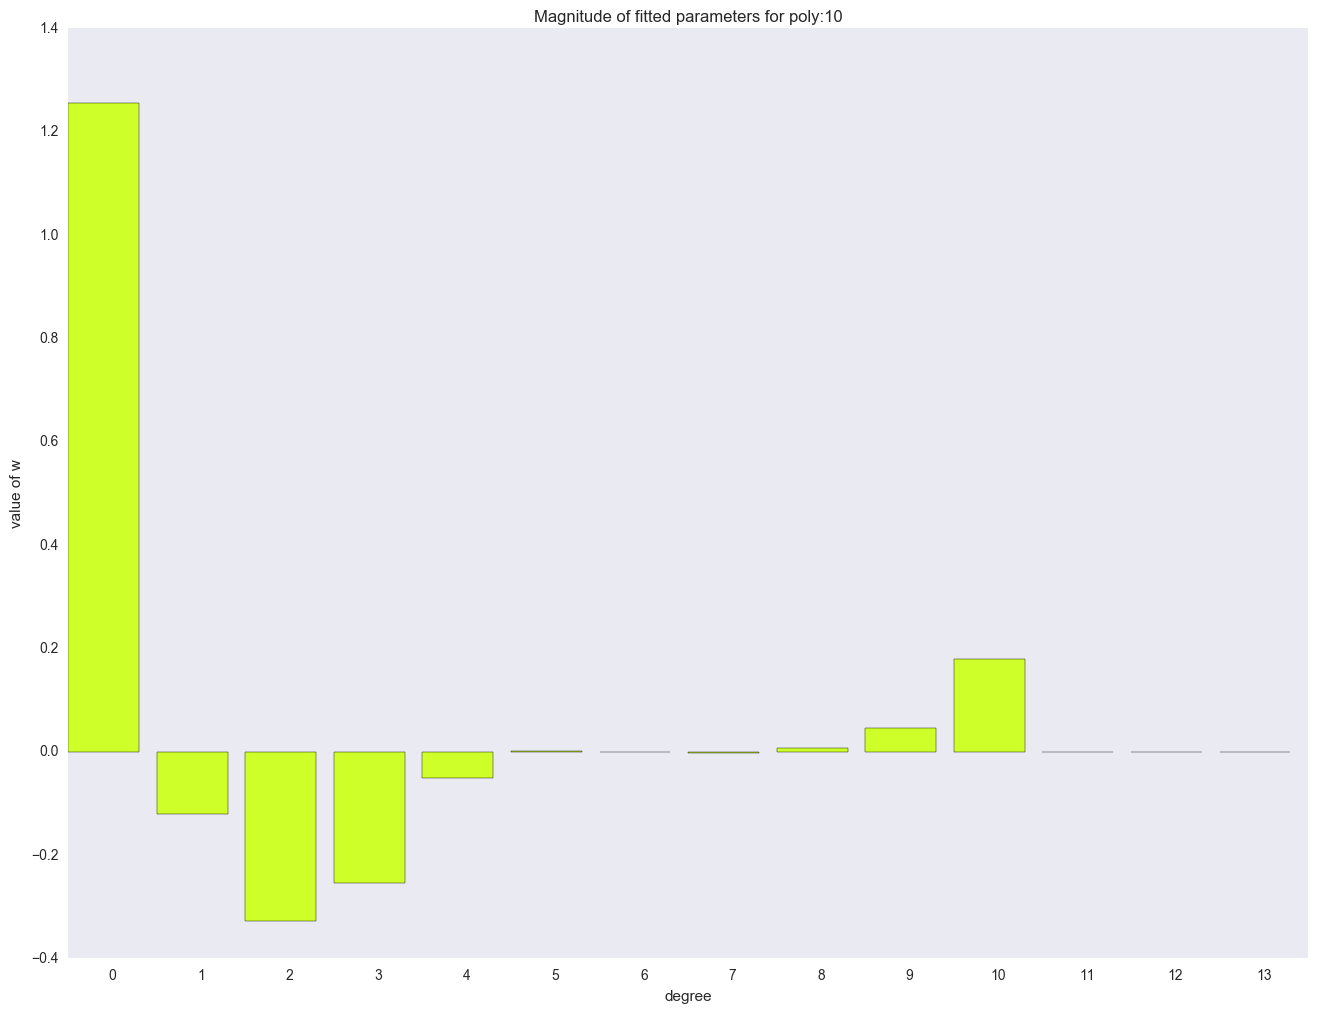

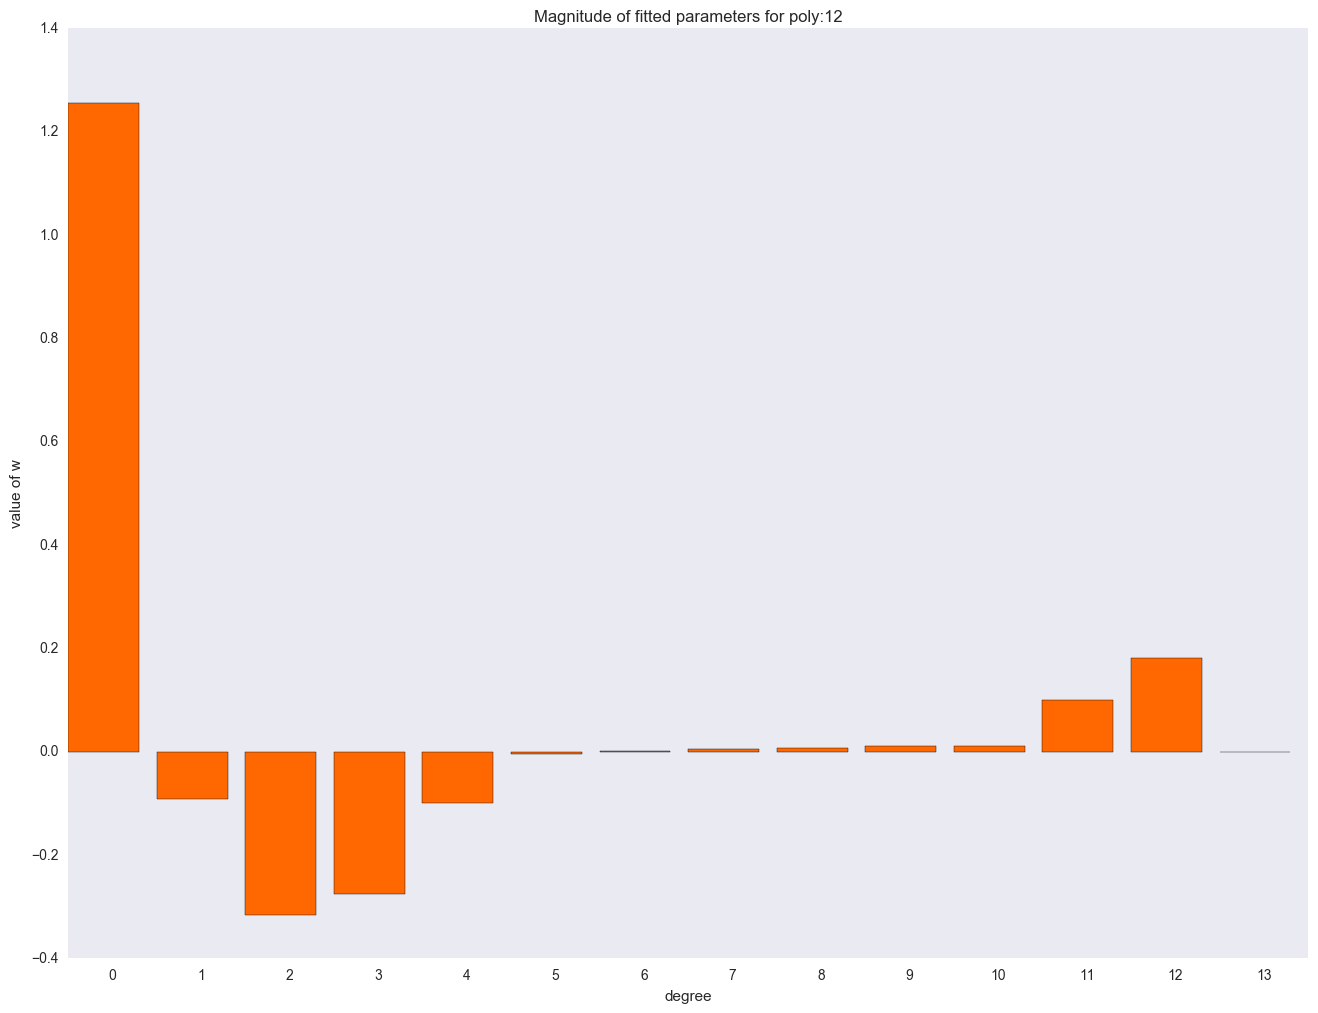

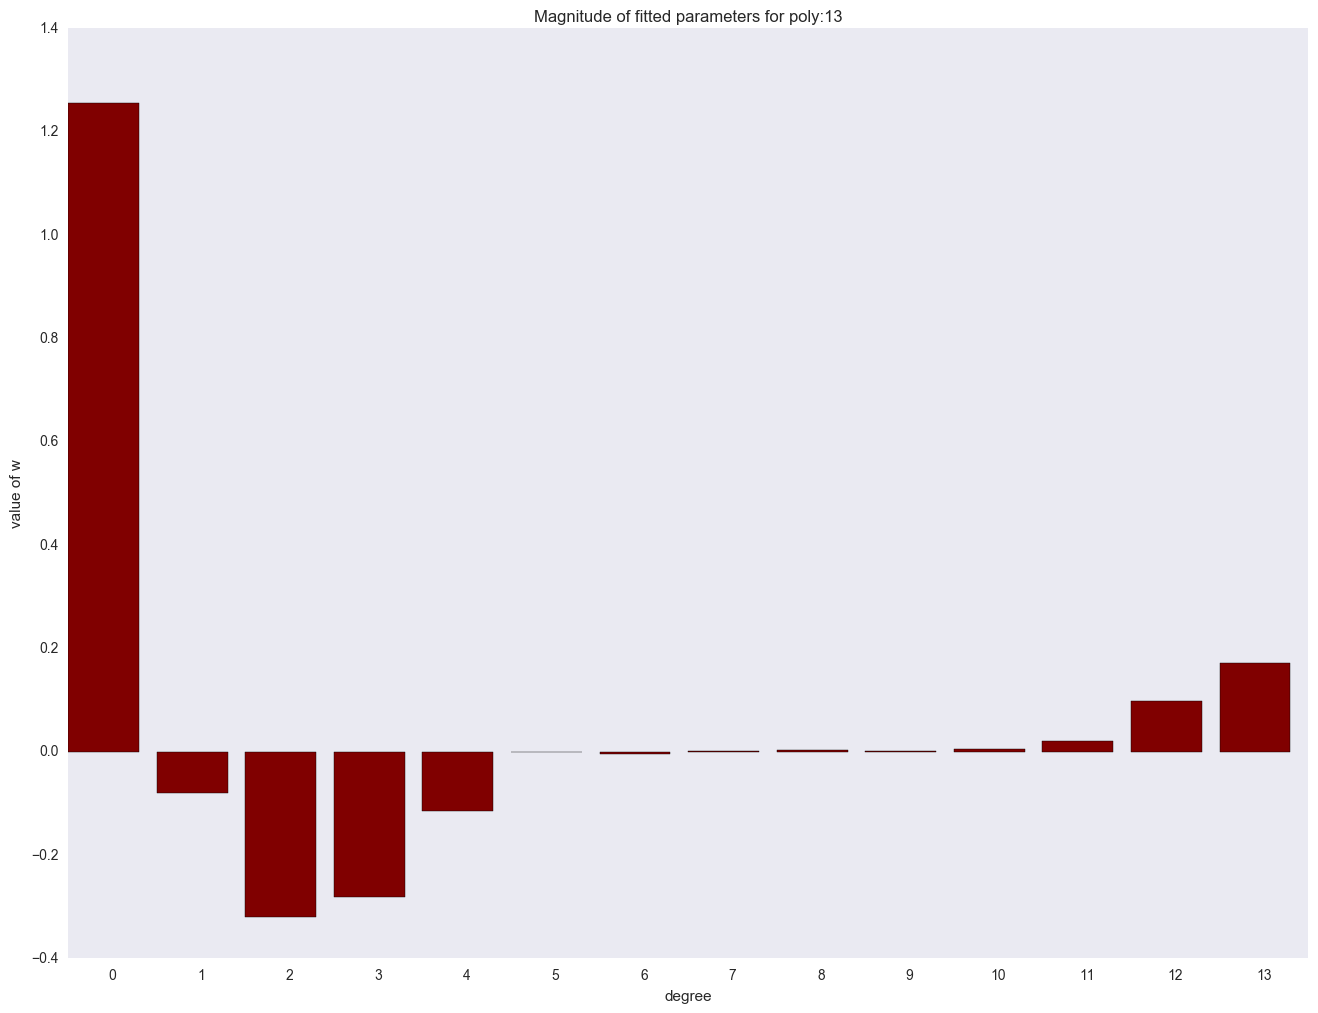

In [12]:
for ix, t in enumerate(w_list_l1):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

In [13]:
# data = generate_wave_set(1000, 100, 100)

# margin = 0.3
# plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
# plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train set')
# plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test set')
# plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
# plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
# plt.legend(loc='upper right', prop={'size': 20})
# plt.title('True manifold and noised data')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()